In [26]:
from numpy import asarray
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
# define input data
data = asarray([0, 0, 0, 1, 1, 0, 0, 0])
data = data.reshape(1, 8, 1)

In [14]:
# create model
model = Sequential()
model.add(Conv1D(1, 3, input_shape=(8, 1)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 1)              4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [5]:
# define a vertical line detector
weights = [asarray([[[0]],[[1]],[[0]]]), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)

In [6]:
# confirm they were stored
print(model.get_weights())

[array([[[0.]],

       [[1.]],

       [[0.]]], dtype=float32), array([0.], dtype=float32)]


In [7]:
# apply filter to input data
yhat = model.predict(data)
print(yhat)

[[[0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]]]


2D

In [31]:
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)

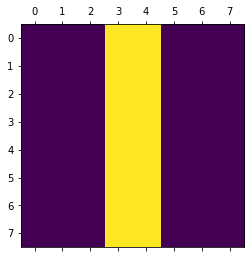

In [32]:
plt.matshow(data.reshape(8,8))

In [20]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [21]:
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())

[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


In [22]:
# apply filter to input data
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


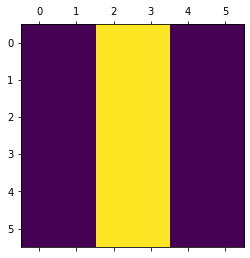

In [28]:
plt.matshow(yhat.reshape(6,6))

In [33]:
from numpy import tensordot
m1 = asarray([[0, 1, 0],
			  [0, 1, 0],
			  [0, 1, 0]])
m2 = asarray([[0, 0, 0],
			  [0, 0, 0],
			  [0, 0, 0]])
print(tensordot(m1, m2))

0
